### Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.


#### You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
- If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
-  If the weekly sales show a seasonal trend, when and what could be the reason?
-  Does temperature affect the weekly sales in any manner?
-  How is the Consumer Price index affecting the weekly sales of various stores?
- Top performing stores according to the historical data.
- The worst performing store, and how significant is the difference between the highest and lowest performing stores.
- Use predictive modeling techniques to forecast the sales for each store for the next 12w eeks

In [1]:
# importing necessary libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the Data sets

In [5]:
data = pd.read_csv('Walmart DataSet.csv')

In [6]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
# Exploratory Data Analysis

In [8]:
data.shape

(6435, 8)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [30]:
data['Unemployment'].max()

14.313

In [31]:
data['Unemployment'].min()

3.879

### important points - 
- Max unemployment Rate is 14.313
- Min unemployment Rate is 3.879



In [33]:
# Extract year from the 'date' column
data['year'] = data['Date'].dt.year


In [45]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [10]:
# converting Date columns to appropriate data type

In [20]:
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [23]:
# checking duplicates and Null values

In [24]:
data.duplicated().sum()

0

In [25]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [62]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [26]:
# Outlier analysis

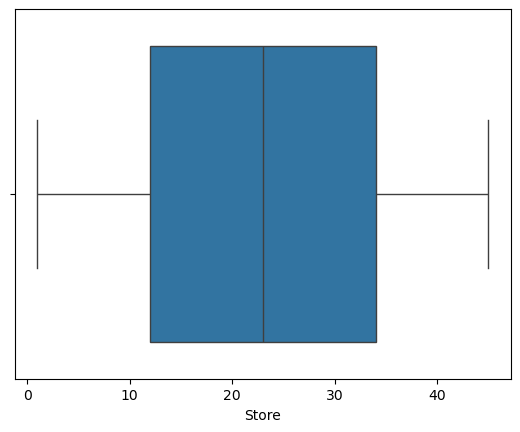

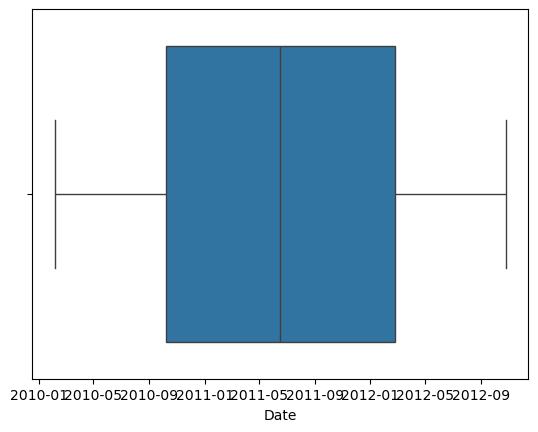

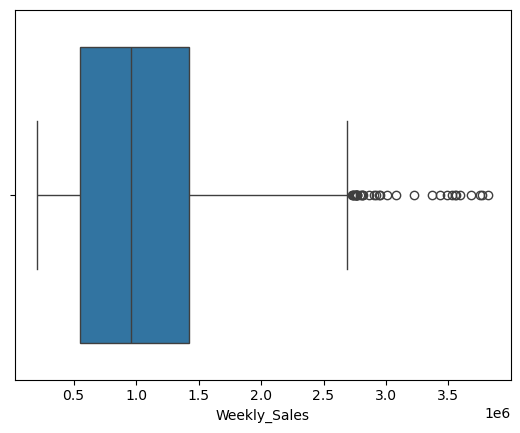

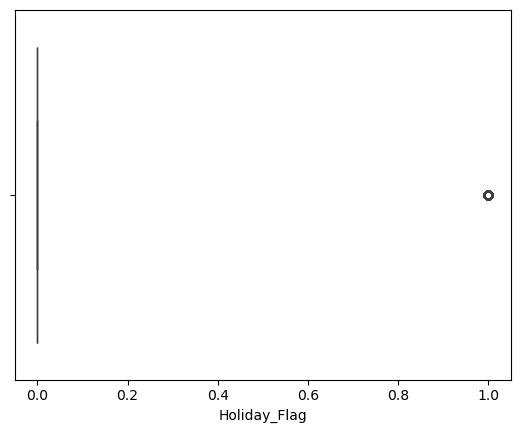

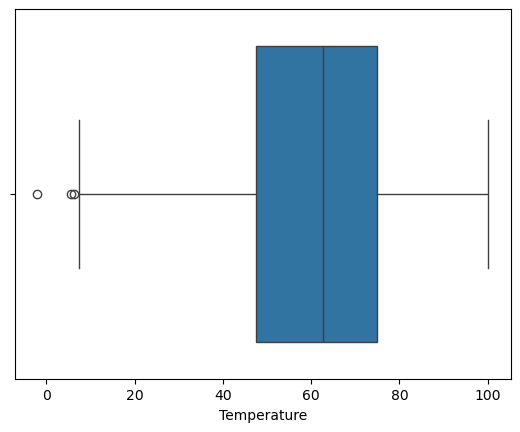

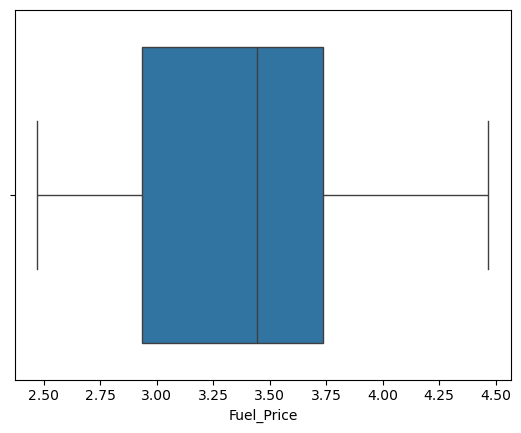

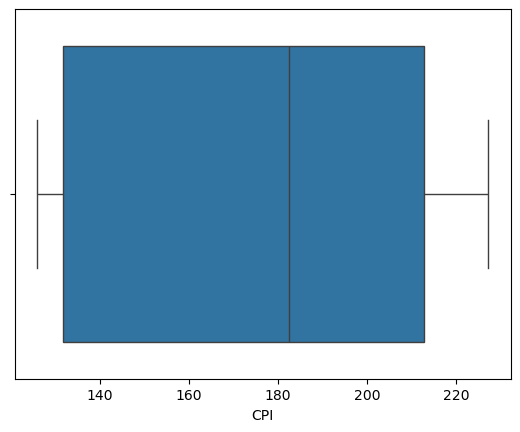

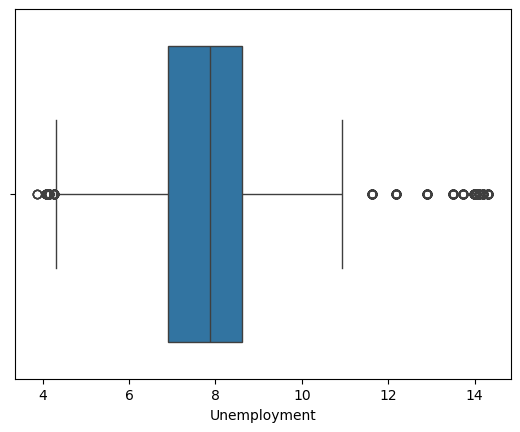

In [61]:
for i in data.columns:
    if data[i].dtypes != 'object' and data[i].dtype != 'int':
        sns.boxplot(x =data[i])
        plt.show()

In [66]:
# We can not remove outliers because it is possible to have a sales of 38 lakh approx in a week 

In [67]:
# Q1 = If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

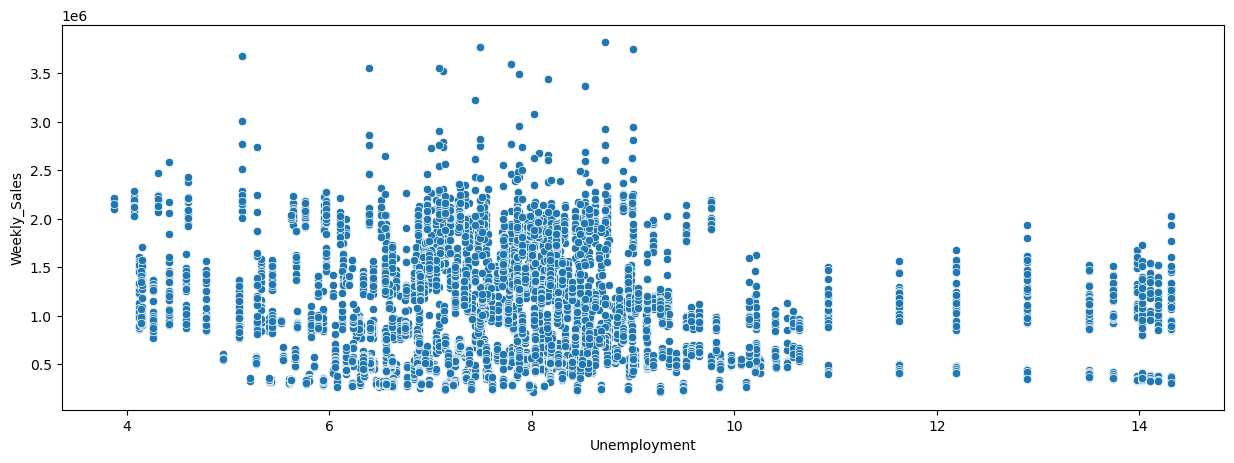

In [69]:
plt.figure(figsize = (15,5))
sns.scatterplot(x =data['Unemployment'], y = data['Weekly_Sales'])

In [70]:
data['Unemployment'].corr(data['Weekly_Sales'])

-0.10617608965795419

<Axes: >

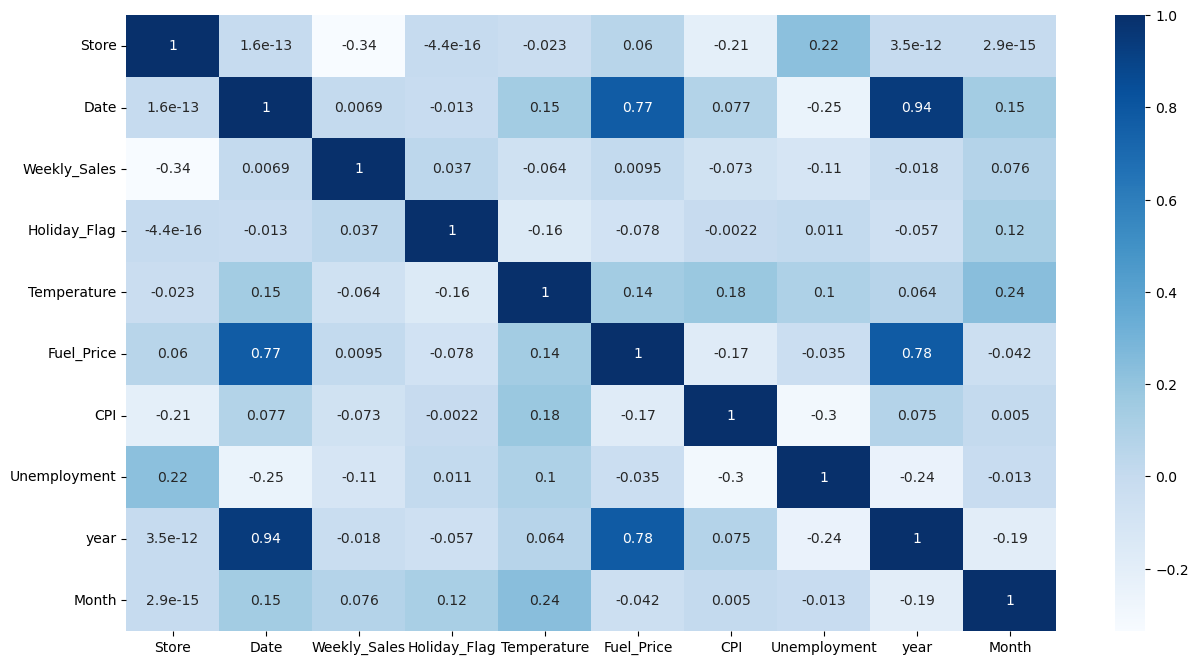

In [116]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), cmap = 'Blues', annot  = True)

#### The correlation between unemployment and weekly sales is weak nagative so we cant say it is affected 

In [75]:
# finding stores who are suffering the most 

In [80]:
data.groupby('Store')['Unemployment'].mean().sort_values(ascending = False)

Store
28    13.116483
38    13.116483
12    13.116483
43     9.934804
34     9.934804
29     9.806385
18     8.838301
35     8.788573
14     8.648748
45     8.648748
7      8.585734
32     8.585734
33     8.533154
24     8.447014
10     8.362965
42     8.362965
22     8.069371
27     8.001748
15     7.996252
19     7.996252
26     7.872070
36     7.869049
39     7.869049
37     7.869049
21     7.623846
2      7.623846
30     7.623846
31     7.623846
1      7.610420
25     7.371413
20     7.371413
11     7.176986
3      7.176986
13     7.001825
41     6.973378
44     6.735622
6      6.606902
17     6.549406
16     6.477993
5      6.295406
9      6.099881
8      6.091846
4      5.964692
40     4.796014
23     4.796014
Name: Unemployment, dtype: float64

### We can say store number 28 , 38 , 12 suffers the most 

In [81]:
# Q2 =  If the weekly sales show a seasonal trend, when and what could be the reason?

In [100]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


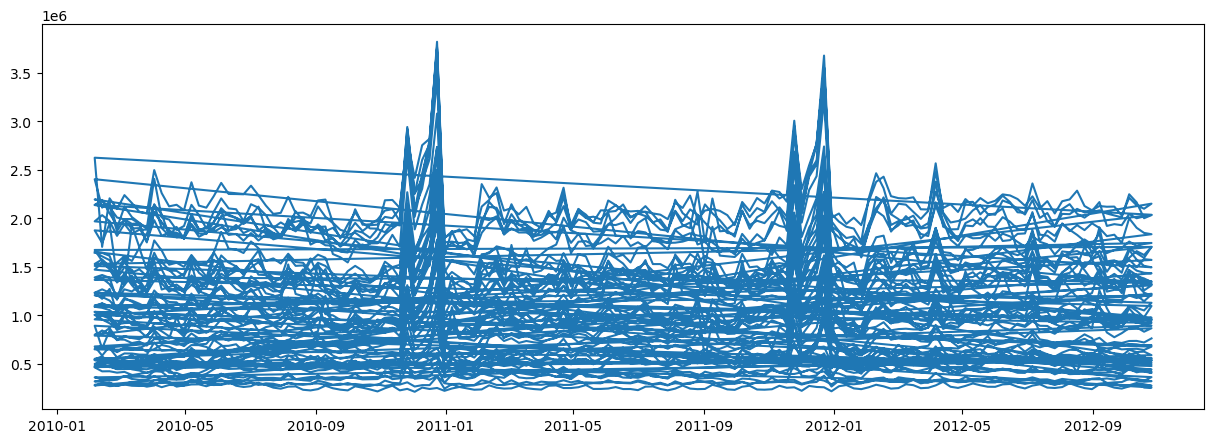

In [107]:
plt.figure(figsize = (15,5))
plt.plot(data['Date'] , data['Weekly_Sales'])

### In the month of january the sales goes High because of the new year

In [109]:
# Q3 = c. Does temperature affect the weekly sales in any manner?

In [110]:
data['Weekly_Sales'].corr(data['Temperature'])

-0.0638100131794696

### No there is no correlation between Temperature and weekly sales

In [119]:
# Q4 = How is the Consumer Price index affecting the weekly sales of various stores?

In [118]:
data['CPI'].corr(data['Weekly_Sales'])

-0.07263416204017631

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

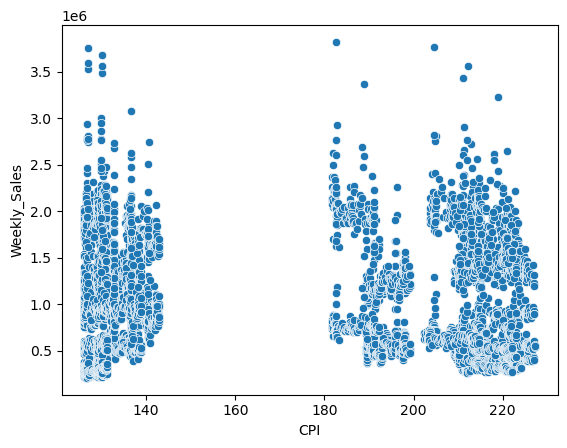

In [117]:
sns.scatterplot(x  = data['CPI'] , y = data['Weekly_Sales'])

### The CPI does not affect the weekly sales according to the datasets

In [120]:
# Q5 = Top performing stores according to the historical data.

In [123]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending  = False).head(5)

In [125]:
top_stores

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

### store number 20 has a highest sales value

In [126]:
# Q6 = The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [127]:
wrost_stores= data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending  = True).head(5)

In [128]:
wrost_stores

Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
Name: Weekly_Sales, dtype: float64

In [130]:
 f'Difference is {3.013978e+08 - 37160221.96}'

'Difference is 264237578.04'

#### Q7 Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [143]:
# Lets do store 1 forecast

In [132]:
store1 = data[data['Store'] == 1]

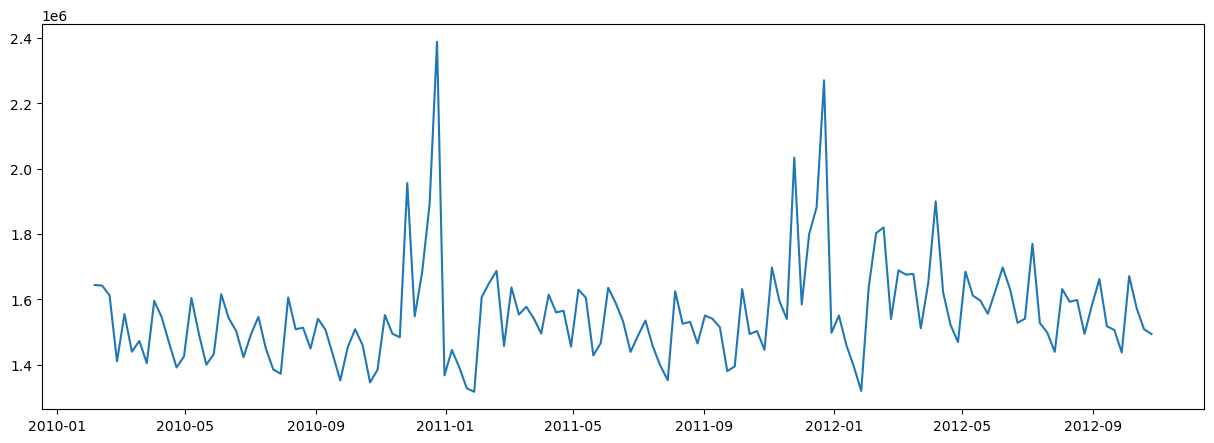

In [135]:
plt.figure(figsize = (15,5))
plt.plot(store1['Date'],store1['Weekly_Sales'])

In [137]:
store1 = store1[['Date' , 'Weekly_Sales']]

In [140]:
store1 = store1.set_index('Date')

<Axes: xlabel='Date'>

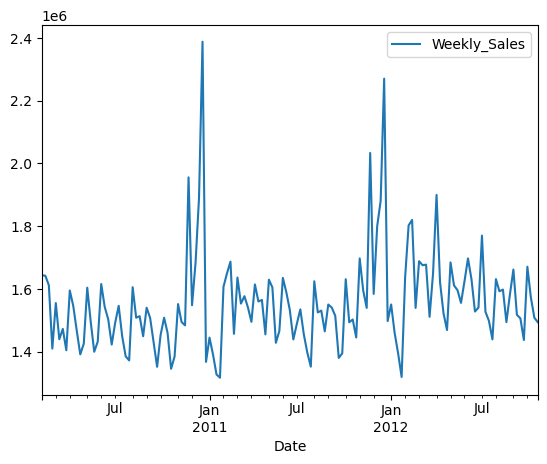

In [142]:
store1.plot()

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

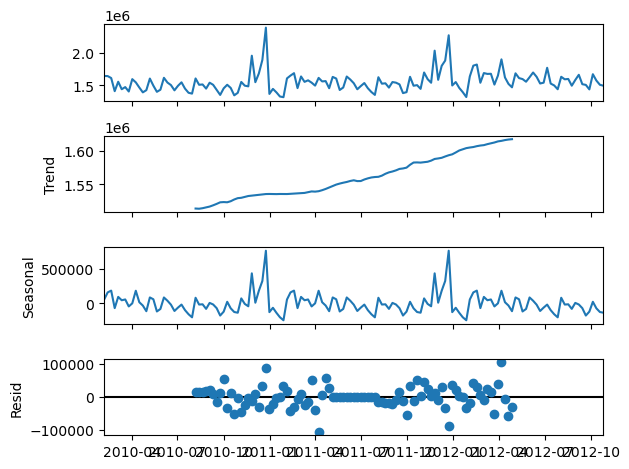

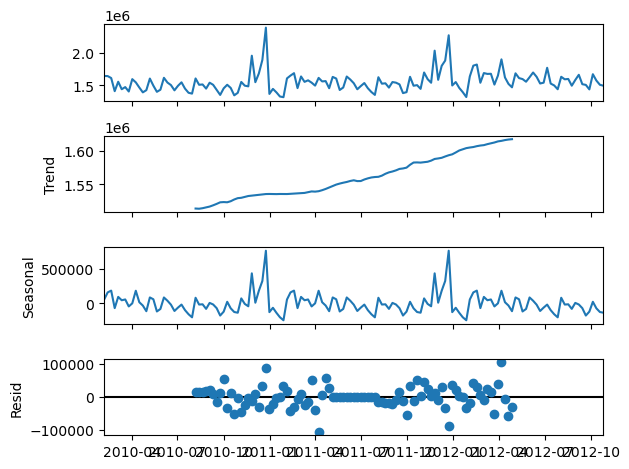

In [148]:
seasonal_decompose(store1).plot()

In [156]:
# split the data into train and test

In [153]:
train = store1[:120]
test = store1[120:]

In [160]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Figure(640x480)


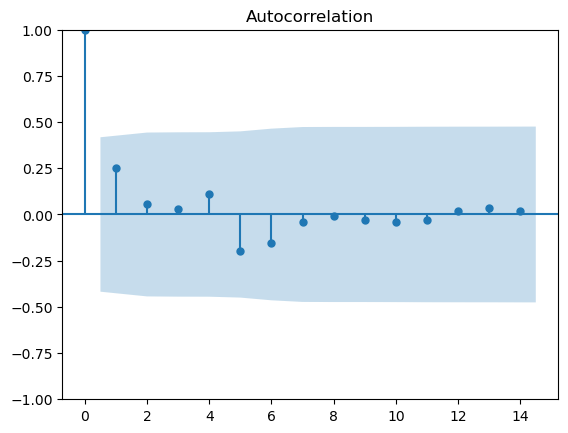

In [161]:
acf_plot = acf(store1)
print(plot_acf(acf_plot))

In [162]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

Figure(640x480)


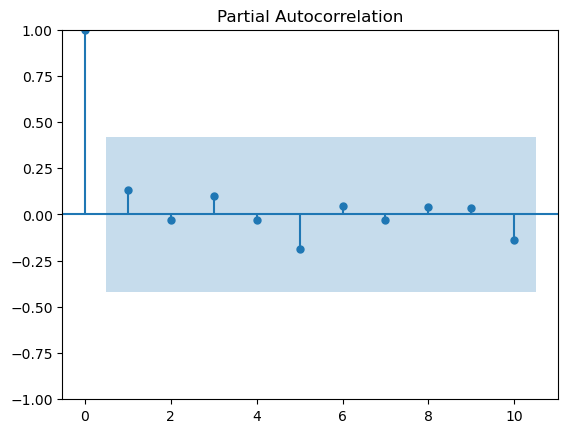

In [165]:
pacf_plot = pacf(store1)
print(plot_pacf(pacf_plot, lags = 10))

In [184]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [171]:
model = SARIMAX(train, order = (1,0,2), seasonal_order = (1,0,2,12))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [172]:
model = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [173]:
store1['Prediction'] = model.predict(start = len(train) , end = len(train) + len(test)-1)

<Axes: xlabel='Date'>

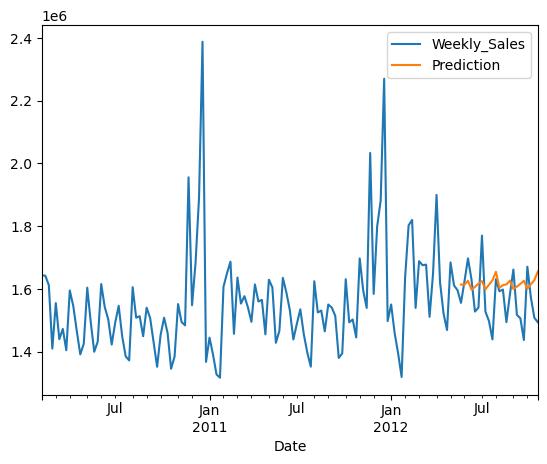

In [175]:
store1[['Weekly_Sales','Prediction']].plot()

In [176]:
import itertools

In [179]:
p = range(8)
d = range(0,2)
q = range(8)

In [178]:
from sklearn.metrics import mean_squared_error

In [180]:
pdq_combination = list(itertools.product(p,d,q))

In [189]:
RMSE = []
order = []

for i in pdq_combination:
    model = SARIMAX(train, order = i)
    model = model.fit()
    pred = model.predict(start = len(train) , end = len(train) + len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order.append(i)
    RMSE.append(error)
    rmse_result = pd.DataFrame(index = order , data = RMSE , columns = ['RMSESCORE'])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: N

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequen

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Max

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provide

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-inv

In [193]:
rmse_result.sort_values(by = 'RMSESCORE', ascending = True)

,RMSESCORE
"(6, 0, 7)",7.755230e+04
"(4, 0, 0)",7.780279e+04
"(3, 0, 0)",7.812555e+04
"(5, 0, 0)",7.863327e+04
"(7, 0, 5)",7.912228e+04
...,...
"(0, 0, 4)",1.500240e+06
"(0, 0, 3)",1.503033e+06
"(0, 0, 2)",1.525777e+06
"(0, 0, 1)",1.544886e+06


In [194]:
# order = (6,0,7)

In [195]:
model = SARIMAX(train , order = (6,0,7))
model = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Max

In [198]:
store1.drop(['Prediction'], axis = 1 , inplace = True)

In [200]:
store1['pred'] = model.predict(start = len(train), end = len(train) + len(test)-1)

<Axes: xlabel='Date'>

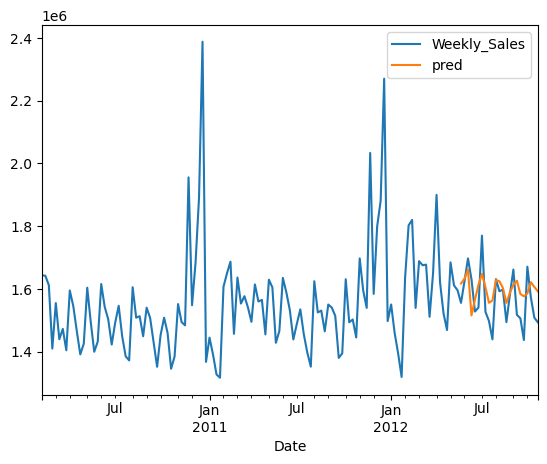

In [202]:
store1[['Weekly_Sales','pred']].plot()

In [217]:
forecast = model.forecast(steps = 60)

In [218]:
forecast 

2012-05-25    1.617236e+06
2012-06-01    1.632552e+06
2012-06-08    1.661782e+06
2012-06-15    1.515539e+06
2012-06-22    1.565819e+06
2012-06-29    1.613349e+06
2012-07-06    1.648108e+06
2012-07-13    1.605817e+06
2012-07-20    1.555782e+06
2012-07-27    1.563095e+06
2012-08-03    1.628492e+06
2012-08-10    1.624425e+06
2012-08-17    1.602882e+06
2012-08-24    1.555358e+06
2012-08-31    1.588103e+06
2012-09-07    1.613688e+06
2012-09-14    1.626185e+06
2012-09-21    1.583736e+06
2012-09-28    1.576432e+06
2012-10-05    1.585066e+06
2012-10-12    1.621632e+06
2012-10-19    1.606221e+06
2012-10-26    1.592015e+06
2012-11-02    1.573154e+06
2012-11-09    1.600771e+06
2012-11-16    1.607637e+06
2012-11-23    1.609525e+06
2012-11-30    1.582044e+06
2012-12-07    1.588399e+06
2012-12-14    1.594464e+06
2012-12-21    1.612890e+06
2012-12-28    1.596131e+06
2013-01-04    1.591538e+06
2013-01-11    1.584352e+06
2013-01-18    1.604017e+06
2013-01-25    1.601450e+06
2013-02-01    1.601064e+06
2

<Axes: xlabel='Date'>

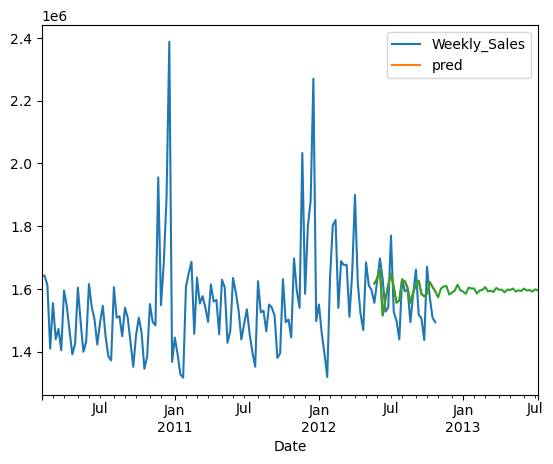

In [220]:
store1.plot()
forecast.plot()

